# Question 1
## The Pigeon Hole Challenge

This took 2.122159719467163 seconds


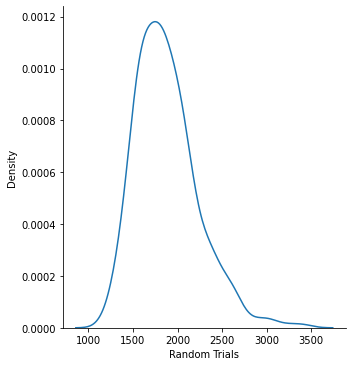

In [7]:
import random
import time
import seaborn as sns
import matplotlib.pyplot as plt

# Domain range
n = 300

# Repeat Count
m = 400

# Trial Count List
kList = []

# Record start time of method
startTime = time.time()

for i in range(m):
    
    # Keep track of what numbers still remain
    domain = []
    
    # Trial count
    k = 0
    
    # While the domain still has numbers that have not had an i∈[n]
    while(len(domain) < n):
        randNum = random.randint(0, n-1)

        if(randNum not in domain):
            domain.append(randNum)

        k += 1
    
    kList.append(k)
    
# Record end time of method
endTime = time.time()

#print(kList)
print("This took", endTime-startTime, "seconds")

# plotting density plot using seaborn
sns.displot(data = kList, kind="kde")
 
# Make the plot using matplotlib
plt.xlabel("Random Trials")
plt.show()

# Question 2
## The Birthday Paradox

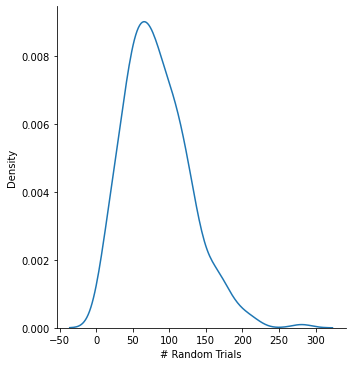

Mean of kList is 83.32333333333334


In [23]:
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Domain Range
n = 5000

# Trial Count
m = 300

kList = []

for i in range(m):
    # List / Hash map to see if number has been generated
    domainList = [0] * n

    # Boolean check on whether or not theres been a collision
    collision = False

    # Number of runs efore a collision
    k = 0

    while not collision:
        randNum = random.randint(0, n-1)

        k += 1

        # If the number has already been generated, collision
        if domainList[randNum] == 1:
            collision = True
        # Otherwise, mark that the number has been generated
        else:
            domainList[randNum] = 1
    
    # Add the k value to the list
    kList.append(k)
    
# plotting density plot using seaborn
sns.displot(data = kList, kind="kde")

# Make the plot using matplotlib
plt.xlabel("# Random Trials")
plt.show()

# x - random trials
# y = m

print("Mean of kList is", sum(kList)/len(kList))

# Question 3
## Jaccard Similarity

In [17]:
# Read the file line by line, ignoring the "\n" character
with open("Random short sentences.txt") as file:
    lines = [line.strip() for line in file.readlines()]

# Convert the individual lines to a set to remove duplicates then convert back to a list
temp = set(lines)
lines = list(temp)

# Function to make word based k grams given a string and a value for k
def makeWordKGrams(sentence, k):
    # Make the sentence lower case and split the sentence into words
    words = sentence.lower().split()
    kgrams = []

    for i in range(len(words) - k + 1):
        # Append to the list a space followed by words[i] to words [i+k]
        kgrams.append(' '.join(words[i:i+k]))
    
    return set(kgrams)


# Function to make character based k grams given a string and a value for k
def makeCharKGrams(sentence, k):
    # Make the sentence lower case and remove spaces
    sentence = sentence.lower().replace(" ", "")
    kgrams = []

    for i in range(len(sentence) - k + 1):
        # Append to the list characters i to i+k
        kgrams.append(sentence[i:i+k])
    
    return set(kgrams)

# Function to perform jaccard similarity on 2 given sets
def jaccard(a: set, b: set):
    return len(a.intersection(b)) / len(a.union(b))
















# Doing character based 2-grams 
print("\nCharacter based 2-gram:")

twoGramChars = []
for line in lines:
    twoGramChars.append(makeCharKGrams(line, 2))

twoGramCharCount = sum([len(gram) for gram in twoGramChars])

print(twoGramCharCount, "unique k grams")

twoGramCharsJaccard = []
for i in range(len(twoGramChars)):
    for j in range(i+1, len(twoGramChars)):
        score = jaccard(twoGramChars[i], twoGramChars[j])
        # Help from ChatGPT
        twoGramCharsJaccard.append((lines[i], lines[j], score))

# Help from ChatGPT
twoGramCharsJaccard.sort(key=lambda x: x[2], reverse=True)

for i in twoGramCharsJaccard[:5]:
    print("Sentences \"{0}\" and \"{1}\", have a jaccard value of {2: .3f}".format(i[0], i[1], i[2]))















# Doing character based 3-grams 
print("\nCharacter based 3-gram:")

k = 2
threeGramChars = []
for line in lines:
    threeGramChars.append(makeCharKGrams(line, 3))

threeGramCharCount = sum([len(gram) for gram in threeGramChars])

print(threeGramCharCount, "unique k grams")

threeGramCharsJaccard = []
for i in range(len(threeGramChars)):
    for j in range(i+1, len(threeGramChars)):
        score = jaccard(threeGramChars[i], threeGramChars[j])
        # Help from ChatGPT
        threeGramCharsJaccard.append((lines[i], lines[j], score))

# Help from ChatGPT
threeGramCharsJaccard.sort(key=lambda x: x[2], reverse=True)

for i in threeGramCharsJaccard[:5]:
    print("Sentences \"{0}\" and \"{1}\", have a jaccard value of {2: .3f}".format(i[0], i[1], i[2]))










# Doing word based 2-grams 
print("\nWord based 2-gram:")

twoGramWords = []
for line in lines:
    twoGramWords.append(makeWordKGrams(line, 2))

twoGramWordsCount = sum([len(gram) for gram in twoGramWords])

print(twoGramWordsCount, "unique k grams")

twoGramWordsJaccard = []
for i in range(len(twoGramWords)):
    for j in range(i+1, len(twoGramWords)):
        score = jaccard(twoGramWords[i], twoGramWords[j])
        # Help from ChatGPT
        twoGramWordsJaccard.append((lines[i], lines[j], score))

# Help from ChatGPT
twoGramWordsJaccard.sort(key=lambda x: x[2], reverse=True)

for i in twoGramCharsJaccard[:5]:
    print("Sentences \"{0}\" and \"{1}\", have a jaccard value of {2: .3f}".format(i[0], i[1], i[2]))


Character based 2-gram:
2490 unique k grams
Sentences "The leaves rustled in the gentle breeze." and "The leaves rustled in the breeze.", have a jaccard value of  0.889
Sentences "The crickets chirped in the night." and "The cricket chirped in the night.", have a jaccard value of  0.889
Sentences "The clouds drifted across the sky." and "The clouds drifted slowly across the sky.", have a jaccard value of  0.806
Sentences "The stars twinkled and glittered in the night sky." and "The stars twinkled in the night sky.", have a jaccard value of  0.694
Sentences "The stars twinkled in the dark sky." and "The stars twinkled in the night sky.", have a jaccard value of  0.679

Character based 3-gram:
2630 unique k grams
Sentences "The crickets chirped in the night." and "The cricket chirped in the night.", have a jaccard value of  0.821
Sentences "The leaves rustled in the gentle breeze." and "The leaves rustled in the breeze.", have a jaccard value of  0.774
Sentences "The clouds drifted acro